## Ryan Tran
## Data 4950
## Class Project
## 10/20/2022

## Import Packages

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import the dataset 

In [219]:
df = pd.read_excel('ForbesAmericasTopColleges2019.xlsx')

### Drop the Rank and Website variable

In [220]:
df = df.drop(["Rank"],axis =1)

In [221]:
df = df.drop(["Website"],axis =1)

* Drop the Rank variable, because these college rankings were determined by Forbes. Drop the Website variable, because we will not be using it at all.

# Data Exploration

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      650 non-null    object 
 1   City                      647 non-null    object 
 2   State                     650 non-null    object 
 3   Public/Private            650 non-null    object 
 4   Undergraduate Population  650 non-null    int64  
 5   Student Population        650 non-null    int64  
 6   Net Price                 648 non-null    float64
 7   Average Grant Aid         646 non-null    float64
 8   Total Annual Cost         650 non-null    int64  
 9   Alumni Salary             635 non-null    float64
 10  Acceptance Rate           648 non-null    float64
 11  SAT Lower                 551 non-null    float64
 12  SAT Upper                 551 non-null    float64
 13  ACT Lower                 553 non-null    float64
 14  ACT Upper 

In [223]:
print("Is there missing values in df:", df.isnull().values.any())

Is there missing values in df: True


* In the following datset, there are 16 variables with a total 650 observations. The dataset consists of int64, float64, and object data types. Also, some of the variables have missing values.

### Correlation Matrix

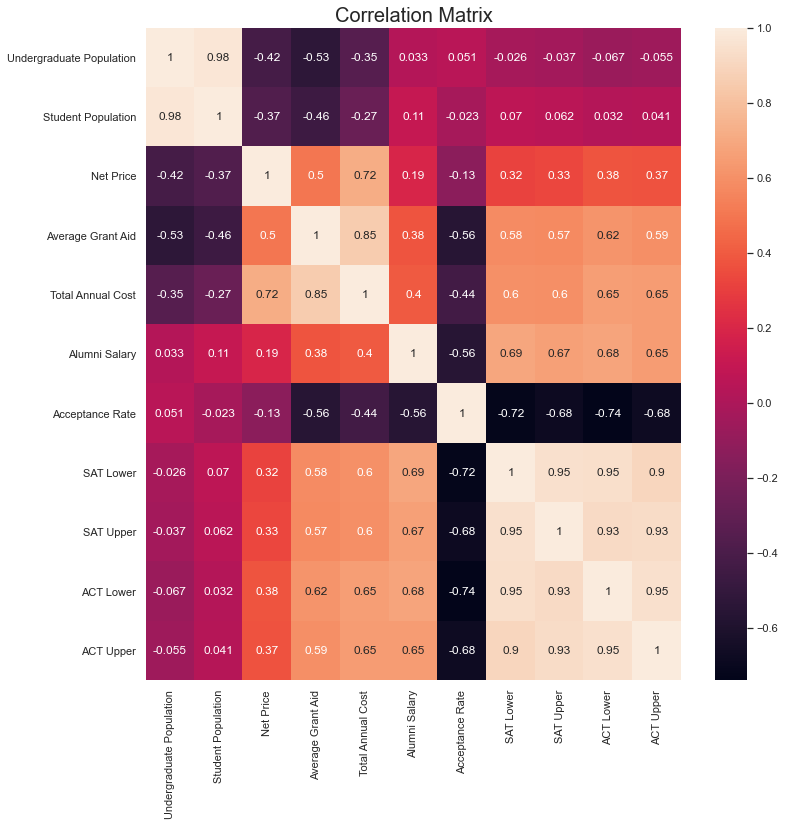

In [224]:
fig = plt.figure(figsize= (12,12))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

* The correlation matrix from this section helps us determine which variables are correlated with each other. The closer the number is to 1 then it means the two variables are positively correlated with each other. The closer it is to -1 then the more negatively correlated the two variables are with each other. This plot also helps us avoid multicollinearity in models. In this case, the ACT and SAT variables are positively correlated with each other with scores between .93 to .95. There are also other variables that are positively correlated, such as Average Grant Aid and Net Price. In other words, as Average Grant Aid increases, the Net Price also increases.

## Distribution Charts

In [225]:
corr = df
numeric_variables = corr.select_dtypes(include=[np.number])
numeric_variables.columns

Index(['Undergraduate Population', 'Student Population', 'Net Price',
       'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary',
       'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper'],
      dtype='object')

In [226]:
# Create numeric_names variable and append all variable names are numeric
numeric_names = []
for name in numeric_variables:
    numeric_names.append(name)
print(numeric_names)

['Undergraduate Population', 'Student Population', 'Net Price', 'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary', 'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper']


<function matplotlib.pyplot.show(close=None, block=None)>

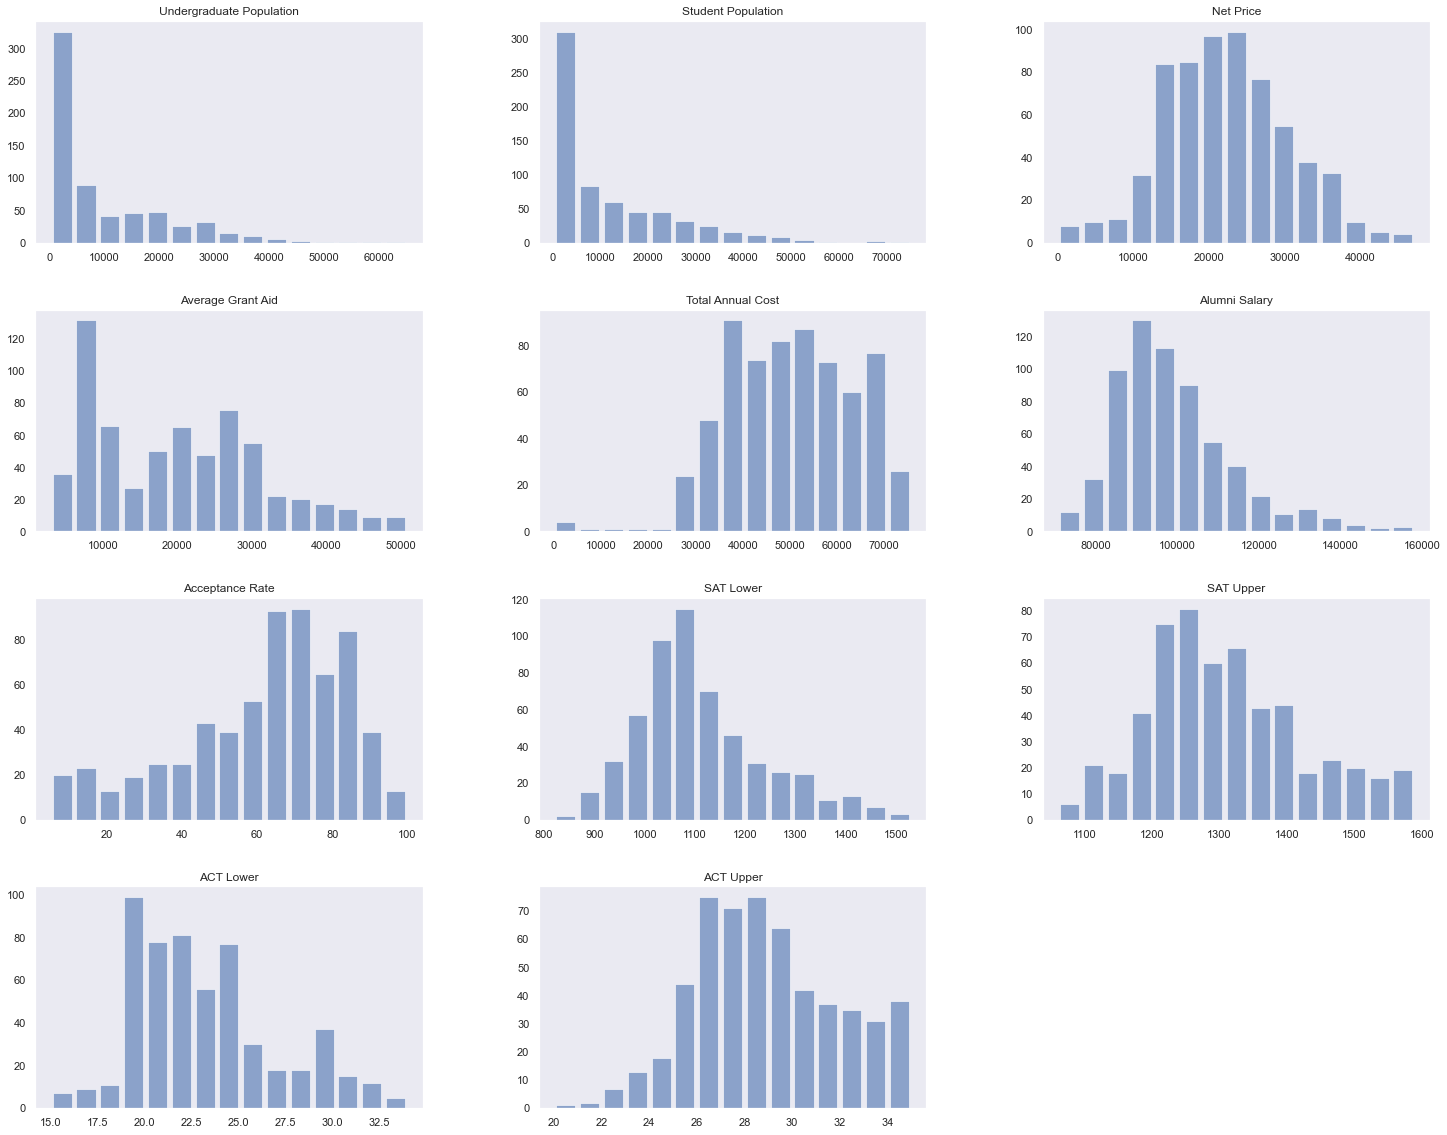

In [227]:
df[numeric_names].hist(bins = 15, figsize = (25,20), alpha = 0.6, grid = False, rwidth =  0.8, sharex = False, sharey = False)
plt.show

* In these charts, I created a distribution chart for each variable that was numeric. This excluded Name, City, State, Public/Private, and Website. From the charts you can tell that most of the variables are not normally distributed. The right skewed distributions are Undergraduate Population, Student Population, Average Grant Aid, and Alumni Salary. On the other hand, the left skewed distributions are Total Annual Cost and Acceptance Rate. Another thing to note is that the SAT and ACT distributions look very similar.  

## Boxplots

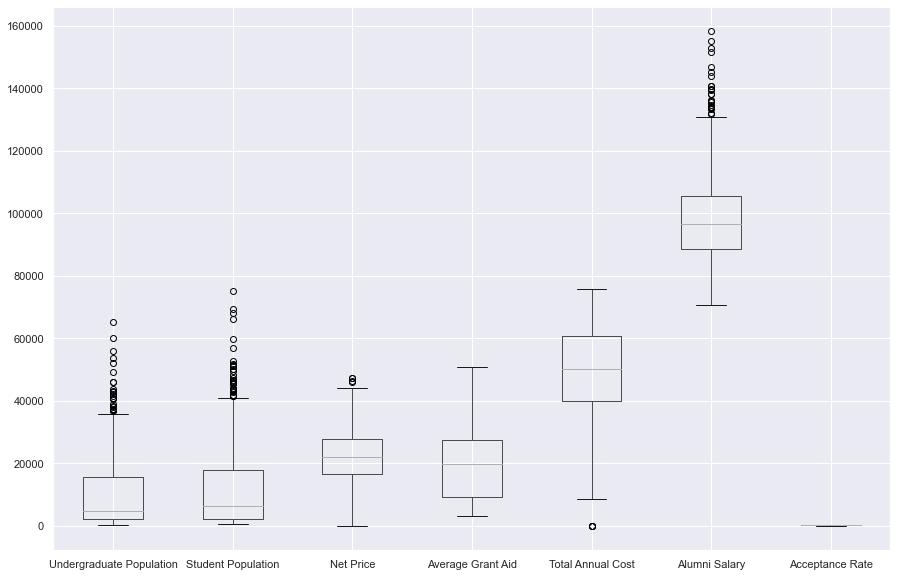

In [228]:
# Remove these variables so it is easier to view
numeric_names.remove("SAT Lower")
numeric_names.remove("SAT Upper")
numeric_names.remove("ACT Lower")
numeric_names.remove("ACT Upper")
df[numeric_names].boxplot(figsize = (15,10))
plt.show()

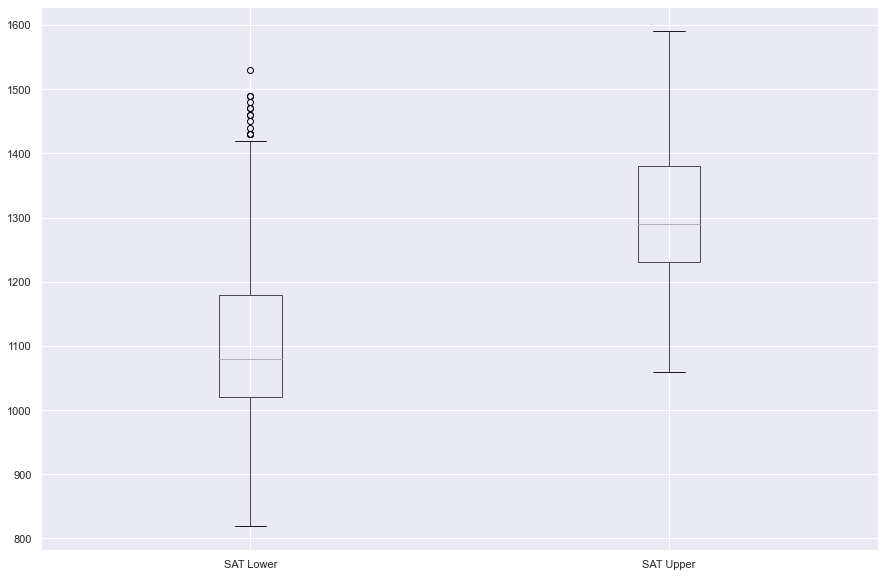

In [229]:
SAT_numerical = ["SAT Lower","SAT Upper"]
df[SAT_numerical].boxplot(figsize = (15,10))
plt.show()

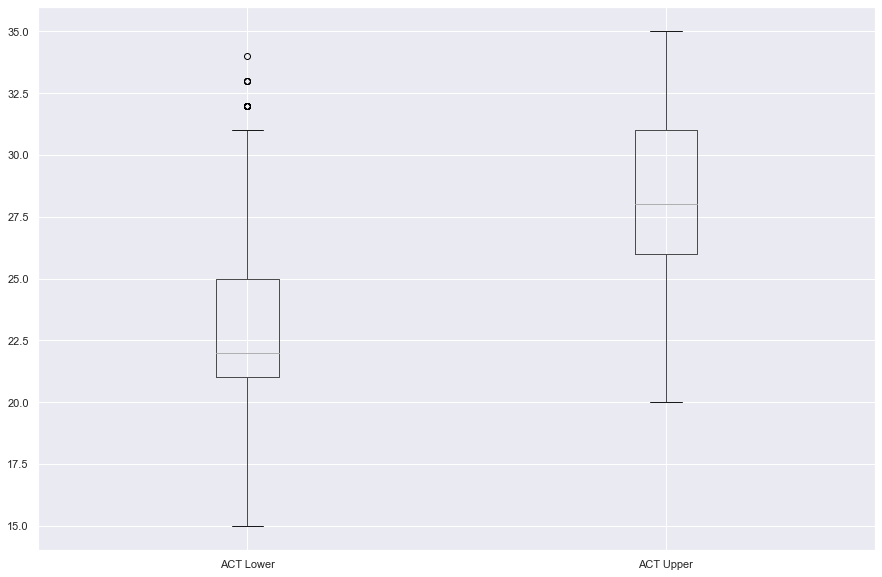

In [230]:
ACT_numerical = ["ACT Lower","ACT Upper"]
df[ACT_numerical].boxplot(figsize = (15,10))
plt.show()

* Boxplots were created and some variables were seperated to make it easier for viewing. In these boxplots, we are able to see the outliers and how the values range in the variables. For example, we can see that alumni salary has some colleges that have a high alumni salary, since there are many outliers and the upper whisker is very long. There is also a large outlier in the Total Annual Cost variable because one college has their cost at $0. 

## Countplots for Public/Private and State Variable

<AxesSubplot:xlabel='Public/Private', ylabel='count'>

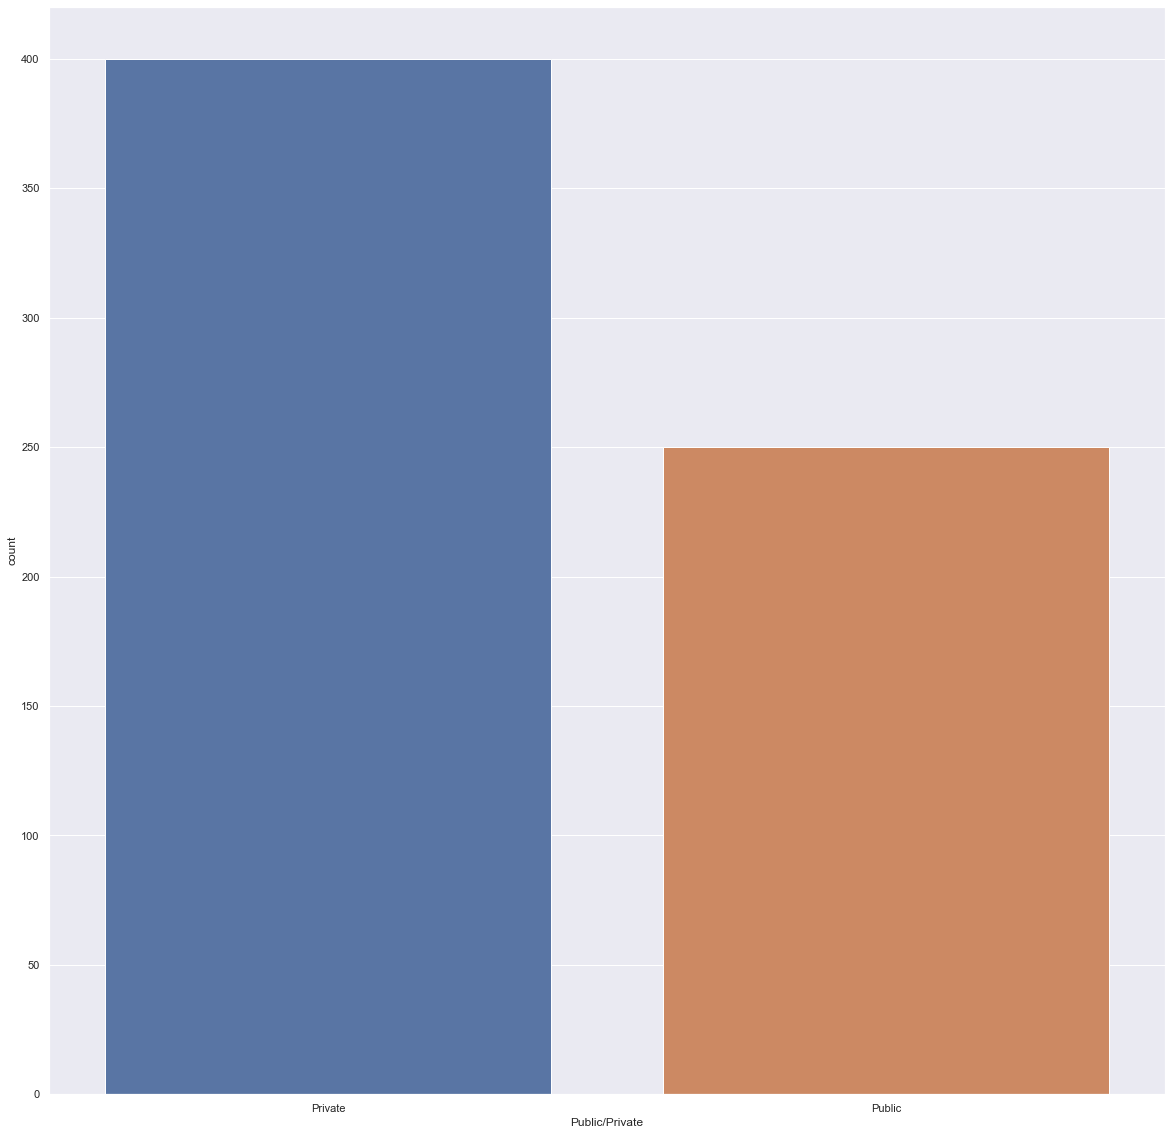

In [231]:
sns.countplot(x = "Public/Private", data = df)

* The countplot shows us that there about 150 Private colleges more than Public colleges.

<AxesSubplot:xlabel='State', ylabel='count'>

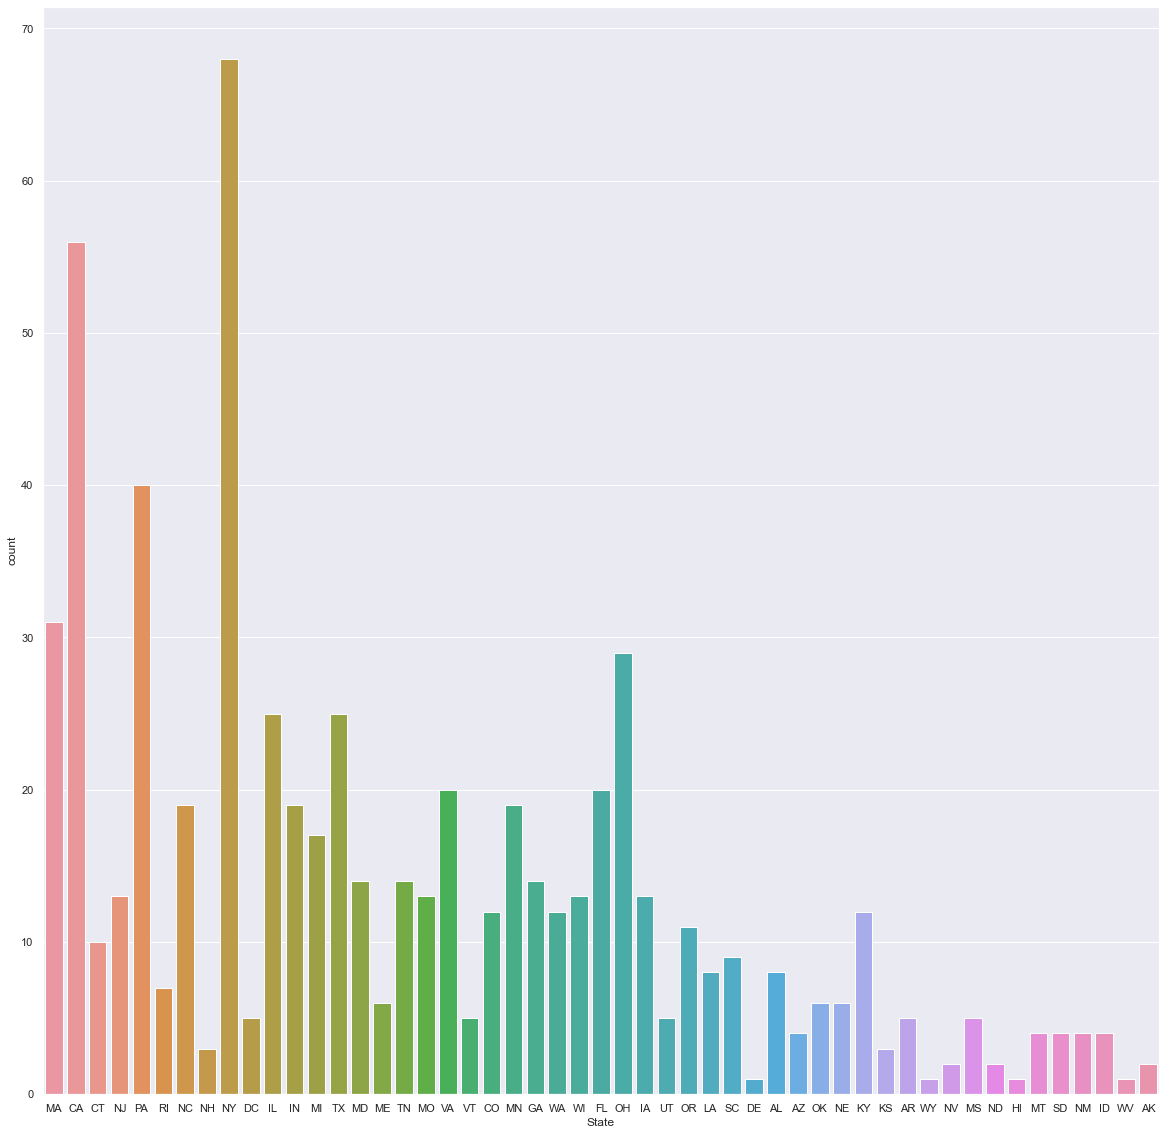

In [232]:
# Increase the size for better view of all states
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot(x = "State", data = df)

* The states with the most colleges are New York, California, Pennsylvania, Massachusetts, and Ohio.

## Feature Engineering

In [233]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      650 non-null    object 
 1   City                      647 non-null    object 
 2   State                     650 non-null    object 
 3   Public/Private            650 non-null    object 
 4   Undergraduate_Population  650 non-null    int64  
 5   Student_Population        650 non-null    int64  
 6   Net_Price                 648 non-null    float64
 7   Average_Grant_Aid         646 non-null    float64
 8   Total_Annual_Cost         650 non-null    int64  
 9   Alumni_Salary             635 non-null    float64
 10  Acceptance_Rate           648 non-null    float64
 11  SAT_Lower                 551 non-null    float64
 12  SAT_Upper                 551 non-null    float64
 13  ACT_Lower                 553 non-null    float64
 14  ACT_Upper 

* We discovered earlier that there are missing variables in this dataframe since there are 650 rows and some variables do not have 650 rows. The variables with missing values are City, Net Price, Acceptance Rate, SAT Lower, SAT Upper, ACT Lower, and ACT Upper.

In [235]:
for i, row in df.iterrows():
    try:
         print(len(row["City"]))
    except:
        print(type(row["City"]))

9
8
9
9
9
12
10
8
6
7
6
9
8
8
10
7
8
10
12
9
7
9
9
9
10
9
9
7
9
11
9
10
15
7
8
10
10
11
8
10
13
9
16
9
11
8
12
8
9
8
11
10
10
9
7
13
6
8
7
9
12
11
12
7
7
11
9
9
7
11
7
9
9
6
10
6
9
10
9
8
11
9
8
13
7
8
6
5
11
12
6
16
9
6
5
7
8
11
6
9
16
11
15
11
8
11
7
10
8
11
9
10
4
9
15
10
13
14
8
8
8
7
13
11
8
10
10
10
6
6
11
11
4
7
9
12
12
10
7
6
5
9
11
10
10
7
6
10
5
7
11
7
9
7
7
8
10
6
12
9
9
7
8
9
6
6
12
10
10
7
11
10
6
8
9
11
7
6
9
9
9
6
10
8
6
5
14
6
12
6
6
10
8
5
9
7
5
8
9
9
8
4
10
14
9
9
7
7
8
13
4
11
5
9
6
12
8
6
8
10
7
6
12
9
6
14
6
5
15
19
7
10
11
9
7
13
10
8
7
10
11
7
6
7
5
6
7
7
12
7
8
10
10
12
13
8
6
10
11
8
9
9
9
6
8
12
12
6
10
13
12
10
6
6
8
8
8
6
7
14
11
10
10
12
11
10
18
10
7
6
13
9
9
10
8
12
6
6
12
9
8
3
<class 'float'>
6
5
7
9
9
7
7
7
13
10
14
10
7
12
9
10
6
10
8
10
12
10
9
6
8
5
8
9
13
12
9
5
10
9
13
6
6
6
14
7
7
8
7
7
7
4
6
9
10
11
9
6
7
6
10
7
13
9
8
14
5
9
9
8
10
5
9
7
9
7
9
6
7
12
8
9
13
10
7
8
6
8
11
16
10
7
12
9
6
11
13
6
11
6
7
11
8
10
<class 'float'>
11
<class 'float'>
1

* In this section, I was trying to figure out why the missing values were not showing up when I tried to print out the row if the City variable was a missing value. After some googling and trying different things, the NaN values were actually Float types.

In [236]:
df["City"] = df["City"].fillna(" ")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      650 non-null    object 
 1   City                      650 non-null    object 
 2   State                     650 non-null    object 
 3   Public/Private            650 non-null    object 
 4   Undergraduate_Population  650 non-null    int64  
 5   Student_Population        650 non-null    int64  
 6   Net_Price                 648 non-null    float64
 7   Average_Grant_Aid         646 non-null    float64
 8   Total_Annual_Cost         650 non-null    int64  
 9   Alumni_Salary             635 non-null    float64
 10  Acceptance_Rate           648 non-null    float64
 11  SAT_Lower                 551 non-null    float64
 12  SAT_Upper                 551 non-null    float64
 13  ACT_Lower                 553 non-null    float64
 14  ACT_Upper 

* I turned the missing values in to a " " because this would allow me to do the feature engineering to the variables that I wanted to do.

### Impute Missing Date for City

In [237]:
for i, row in df.iterrows():
    if row["City"] == " ":
        print(i)
        print(row)
        print(" ")

302
Name                        Maryland Institute College of Art
City                                                         
State                                                      MD
Public/Private                                        Private
Undergraduate_Population                                 2041
Student_Population                                       2128
Net_Price                                             38763.0
Average_Grant_Aid                                     18939.0
Total_Annual_Cost                                       62850
Alumni_Salary                                         84500.0
Acceptance_Rate                                          62.0
SAT_Lower                                              1060.0
SAT_Upper                                              1290.0
ACT_Lower                                                24.0
ACT_Upper                                                29.0
Name: 302, dtype: object
 
401
Name                        Califor

In [238]:
# Add in the missing cities for these colleges
df.loc[302,"City"] = "Baltimore"
df.loc[401,"City"] = "Santa Clarita"
df.loc[403,"City"] = "Boston"

print(df.iloc[302]["City"])
print(df.iloc[401]["City"])
print(df.iloc[403]["City"])

Baltimore
Santa Clarita
Boston


* Since there was only 3 variables with missing data, I manually imputed the missing cities.

### Impute for the rest of the missing variables

In [239]:
df.info()
df.groupby('Public/Private').mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      650 non-null    object 
 1   City                      650 non-null    object 
 2   State                     650 non-null    object 
 3   Public/Private            650 non-null    object 
 4   Undergraduate_Population  650 non-null    int64  
 5   Student_Population        650 non-null    int64  
 6   Net_Price                 648 non-null    float64
 7   Average_Grant_Aid         646 non-null    float64
 8   Total_Annual_Cost         650 non-null    int64  
 9   Alumni_Salary             635 non-null    float64
 10  Acceptance_Rate           648 non-null    float64
 11  SAT_Lower                 551 non-null    float64
 12  SAT_Upper                 551 non-null    float64
 13  ACT_Lower                 553 non-null    float64
 14  ACT_Upper 

,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
Public/Private,,,,,,,,,,,
Private,3994.095,5552.835,26815.281407,26796.227500,57082.6275,99372.727273,57.957500,1133.654321,1330.138889,24.143731,29.168196
Public,19616.448,22373.420,15207.440000,9031.178862,39526.2520,98050.000000,67.467742,1076.590308,1276.590308,22.026549,27.389381


* Instead of foward filling or inserting the mean for the missing values for the imputing of the data, I wanted to get more specific and fill by the mean of whether it was Private or Public college.

In [240]:
# Here, I did the same thing I did with the City variable. I filled the missing values with a " " to be able to loop through each variable and find the missing values.
df = df.fillna(" ")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Name                      650 non-null    object
 1   City                      650 non-null    object
 2   State                     650 non-null    object
 3   Public/Private            650 non-null    object
 4   Undergraduate_Population  650 non-null    int64 
 5   Student_Population        650 non-null    int64 
 6   Net_Price                 650 non-null    object
 7   Average_Grant_Aid         650 non-null    object
 8   Total_Annual_Cost         650 non-null    int64 
 9   Alumni_Salary             650 non-null    object
 10  Acceptance_Rate           650 non-null    object
 11  SAT_Lower                 650 non-null    object
 12  SAT_Upper                 650 non-null    object
 13  ACT_Lower                 650 non-null    object
 14  ACT_Upper                 

In [241]:
# Itterate through the dataframe and impute the missing data with the variable's average of a private or public college
net_count = 0
ga_count = 0
alumni_count = 0
accept_count = 0
slow_count = 0
shigh_count = 0
alow_count = 0
ahigh_count = 0

for i, row in df.iterrows():
    if row["Net_Price"] == " ":
        net_count += 1
        if row["Public/Private"] == "Private":
            df.loc[i,"Net_Price"] = 26815
        else:
            df[i]["Net_Price"] = 15207
    if row["Average_Grant_Aid"] == " ":
        ga_count += 1
        if row["Public/Private"] == "Private":
            df.loc[i,"Average_Grant_Aid"] = 26796
        else:
            df.loc[i,"Average_Grant_Aid"] = 9031
    if row["Alumni_Salary"] == " ":
        alumni_count += 1
        if row["Public/Private"] == "Private":
            df.loc[i,"Alumni_Salary"] = 99373
        else:
            df.loc[i,"Alumni_Salary"] = 98050
    if row["Acceptance_Rate"] == " ":
        accept_count += 1
        if row["Public/Private"] == "Private":
            df.loc[i,"Acceptance_Rate"] = 58
        else:
            df.loc[i,"Acceptance_Rate"] = 67
    if row["SAT_Lower"] == " ":
        slow_count += 1
        if row["Public/Private"] == "Private":
            df.loc[i,"SAT_Lower"] = 1134
        else:
            df.loc[i,"SAT_Lower"] = 1077
    if row["SAT_Upper"] == " ":
        shigh_count += 1
        if row["Public/Private"] == "Private":
            df.loc[i,"SAT_Upper"] = 1330
        else:
            df.loc[i,"SAT_Upper"] = 1277
    if row["ACT_Lower"] == " ":
        alow_count += 1
        if row["Public/Private"] == "Private":
            df.loc[i,"ACT_Lower"] = 24
        else:
            df.loc[i,"ACT_Lower"] = 22
    if row["ACT_Upper"] == " ":
        ahigh_count += 1
        if row["Public/Private"] == "Private":
            df.loc[i,"ACT_Upper"] = 29
        else:
            df.loc[i,"ACT_Upper"] = 27

print(net_count)
print(ga_count)
print(alumni_count)
print(accept_count)
print(slow_count)
print(shigh_count)
print(alow_count)
print(ahigh_count)

2
4
15
2
99
99
97
97


In [242]:
print(df.loc[23])

Name                        United States Naval Academy
City                                          Annapolis
State                                                MD
Public/Private                                   Public
Undergraduate_Population                           4495
Student_Population                                 4526
Net_Price                                           0.0
Average_Grant_Aid                                  9031
Total_Annual_Cost                                     0
Alumni_Salary                                  152800.0
Acceptance_Rate                                     8.0
SAT_Lower                                        1150.0
SAT_Upper                                        1370.0
ACT_Lower                                            22
ACT_Upper                                            27
Name: 23, dtype: object


* Based on the output of the counters and the example row, it looks like the values were imputed for each variable correctly.

In [243]:
# Turn the data types of these variables back to numeric
df["Net_Price"] = pd.to_numeric(df["Net_Price"])
df["Average_Grant_Aid"] = pd.to_numeric(df["Average_Grant_Aid"])
df["Alumni_Salary"] = pd.to_numeric(df["Alumni_Salary"])
df["Acceptance_Rate"] = pd.to_numeric(df["Acceptance_Rate"])
df["SAT_Lower"] = pd.to_numeric(df["SAT_Lower"])
df["SAT_Upper"] = pd.to_numeric(df["SAT_Upper"])
df["ACT_Lower"] = pd.to_numeric(df["ACT_Lower"])
df["ACT_Upper"] = pd.to_numeric(df["ACT_Upper"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      650 non-null    object 
 1   City                      650 non-null    object 
 2   State                     650 non-null    object 
 3   Public/Private            650 non-null    object 
 4   Undergraduate_Population  650 non-null    int64  
 5   Student_Population        650 non-null    int64  
 6   Net_Price                 650 non-null    float64
 7   Average_Grant_Aid         650 non-null    float64
 8   Total_Annual_Cost         650 non-null    int64  
 9   Alumni_Salary             650 non-null    float64
 10  Acceptance_Rate           650 non-null    float64
 11  SAT_Lower                 650 non-null    float64
 12  SAT_Upper                 650 non-null    float64
 13  ACT_Lower                 650 non-null    float64
 14  ACT_Upper 

In [244]:
df.groupby('Public/Private').mean()

,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
Public/Private,,,,,,,,,,,
Private,3994.095,5552.835,26815.28,26796.2275,57082.6275,99372.7375,57.9575,1133.720,1330.1125,24.1175,29.1375
Public,19616.448,22373.420,15207.44,9031.1760,39526.2520,98050.0000,67.4640,1076.628,1276.6280,22.0240,27.3520


* Based on the means after the imputations, it seems that the averages have not shifted a lot. This is a good think because it tells us that the imputations we made did not skew our data. 

# Ranking Algorithm

* This ranking system is based on a school’s average grant aid, total annual cost, and  alumni salary.

### Look at the top 10 colleges and universities in each variable

In [245]:
df.sort_values('Average_Grant_Aid',ascending=False,inplace=True)
df.head(10)

,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
2,Yale University,New Haven,CT,Private,6483,12974,18627.0,50897.0,71290,138300.0,7.0,1460.0,1580.0,32.0,35.0
1,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,1390.0,1540.0,32.0,35.0
0,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1460.0,1590.0,32.0,35.0
27,Amherst College,Amherst,MA,Private,1836,1945,22463.0,49467.0,71300,116500.0,13.0,1400.0,1560.0,32.0,34.0
13,Columbia University,New York,NY,Private,8523,30454,24231.0,49185.0,74199,126800.0,7.0,1410.0,1570.0,31.0,34.0
11,Pomona College,Claremont,CA,Private,1599,1665,15840.0,48930.0,69725,117200.0,8.0,1370.0,1530.0,30.0,34.0
4,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,139400.0,6.0,1430.0,1570.0,31.0,35.0
18,Williams College,Williamstown,MA,Private,2134,2227,22667.0,48050.0,70650,127500.0,15.0,1400.0,1570.0,31.0,35.0
8,Duke University,Durham,NC,Private,7184,16130,35737.0,47836.0,71764,132100.0,10.0,1380.0,1540.0,31.0,35.0
9,Dartmouth College,Hanover,NH,Private,4693,6509,30421.0,47171.0,71827,130900.0,10.0,1430.0,1560.0,30.0,34.0


* In the top 10, we see prestigous universities like Yale, Harvard, and Princeton.

In [246]:
df.sort_values('Total_Annual_Cost',ascending=False,inplace=True)
df.head(10)

,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
15,University of Chicago,Chicago,IL,Private,6915,16227,25455.0,37883.0,75735,114200.0,9.0,1480.0,1580.0,32.0,35.0
22,Harvey Mudd College,Claremont,CA,Private,847,861,34464.0,33782.0,74428,158200.0,15.0,1470.0,1570.0,33.0,35.0
13,Columbia University,New York,NY,Private,8523,30454,24231.0,49185.0,74199,126800.0,7.0,1410.0,1570.0,31.0,34.0
16,Northwestern University,Evanston,IL,Private,10163,22008,24047.0,44247.0,72980,115400.0,9.0,1420.0,1560.0,32.0,34.0
90,Southern Methodist University,Dallas,TX,Private,6917,11789,32190.0,33203.0,72408,110400.0,49.0,1270.0,1440.0,28.0,32.0
140,Fordham University,Bronx,NY,Private,10137,16037,35694.0,27530.0,72239,112500.0,46.0,1230.0,1410.0,27.0,31.0
29,University of Southern California,Los Angeles,CA,Private,20582,45687,30232.0,36686.0,72209,120600.0,16.0,1300.0,1500.0,30.0,34.0
30,Washington University in St. Louis,St. Louis,MO,Private,8533,15303,28540.0,41977.0,71975,114900.0,16.0,1470.0,1570.0,32.0,34.0
9,Dartmouth College,Hanover,NH,Private,4693,6509,30421.0,47171.0,71827,130900.0,10.0,1430.0,1560.0,30.0,34.0
34,New York University,New York,NY,Private,30252,51123,40336.0,31542.0,71790,117700.0,28.0,1290.0,1490.0,29.0,33.0


* Based of the top 10, higher costing schools tend to be private.

In [247]:
df.sort_values('Alumni_Salary',ascending=False,inplace=True)
df.head(10)

,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
22,Harvey Mudd College,Claremont,CA,Private,847,861,34464.0,33782.0,74428,158200.0,15.0,1470.0,1570.0,33.0,35.0
3,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771.0,43248.0,67430,155200.0,7.0,1490.0,1570.0,33.0,35.0
23,United States Naval Academy,Annapolis,MD,Public,4495,4526,0.0,9031.0,0,152800.0,8.0,1150.0,1370.0,22.0,27.0
7,California Institute of Technology,Pasadena,CA,Private,1002,2238,24245.0,41408.0,68901,151600.0,8.0,1530.0,1590.0,34.0,35.0
0,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1460.0,1590.0,32.0,35.0
1,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,1390.0,1540.0,32.0,35.0
31,United States Military Academy,West Point,NY,Public,4491,4568,0.0,9031.0,0,144000.0,10.0,1185.0,1400.0,23.0,28.0
65,United States Merchant Marine Academy,Kings Point,NY,Public,912,975,6758.0,3597.0,8646,140700.0,22.0,1210.0,1280.0,26.0,28.0
332,SUNY Maritime College,Throggs Neck,NY,Public,1778,1794,18413.0,7134.0,34958,140700.0,69.0,1100.0,1253.0,22.0,26.0
151,Stevens Institute of Technology,Hoboken,NJ,Private,3144,6916,36620.0,25762.0,67204,139900.0,44.0,1320.0,1470.0,29.0,33.0


* Schools with well-known and paid alumni such as Harvard, MIT, and Stanford rank high on this list.

### Create a variable to base ranking off of...

Alumni Salary + Average Grant Aid - Total Annual Cost = Net_Sum

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 22 to 647
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      650 non-null    object 
 1   City                      650 non-null    object 
 2   State                     650 non-null    object 
 3   Public/Private            650 non-null    object 
 4   Undergraduate_Population  650 non-null    int64  
 5   Student_Population        650 non-null    int64  
 6   Net_Price                 650 non-null    float64
 7   Average_Grant_Aid         650 non-null    float64
 8   Total_Annual_Cost         650 non-null    int64  
 9   Alumni_Salary             650 non-null    float64
 10  Acceptance_Rate           650 non-null    float64
 11  SAT_Lower                 650 non-null    float64
 12  SAT_Upper                 650 non-null    float64
 13  ACT_Lower                 650 non-null    float64
 14  ACT_Upper

In [249]:
# Added a new variable called Net_Sum
df = df.assign(Net_Sum = (df.Alumni_Salary + df.Average_Grant_Aid - df.Total_Annual_Cost))

In [250]:
df.head(5)

,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Net_Sum
22,Harvey Mudd College,Claremont,CA,Private,847,861,34464.0,33782.0,74428,158200.0,15.0,1470.0,1570.0,33.0,35.0,117554.0
3,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771.0,43248.0,67430,155200.0,7.0,1490.0,1570.0,33.0,35.0,131018.0
23,United States Naval Academy,Annapolis,MD,Public,4495,4526,0.0,9031.0,0,152800.0,8.0,1150.0,1370.0,22.0,27.0,161831.0
7,California Institute of Technology,Pasadena,CA,Private,1002,2238,24245.0,41408.0,68901,151600.0,8.0,1530.0,1590.0,34.0,35.0,124107.0
0,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1460.0,1590.0,32.0,35.0,127070.0


* Based on the first five rows of the dataframe, it seems like our variable was created and added in the dataframe correctly

* The first row's Net Per Student equals the manually calculated number

In [251]:
# For insurance, we can manually calculate the first row's "Net_Sum" value
print((158200.0 + 33782.0 - 74428.0))

117554.0


In [252]:
# Sort the values in descending order by the school's Net Sum
df = df.sort_values("Net_Sum",ascending=False)

In [253]:
# Reset the index
df = df.reset_index()

In [254]:
df.head(10)

,index,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Net_Sum
0,23,United States Naval Academy,Annapolis,MD,Public,4495,4526,0.0,9031.0,0,152800.0,8.0,1150.0,1370.0,22.0,27.0,161831.0
1,31,United States Military Academy,West Point,NY,Public,4491,4568,0.0,9031.0,0,144000.0,10.0,1185.0,1400.0,23.0,28.0,153031.0
2,42,United States Air Force Academy,Colorado Springs,CO,Public,4237,4276,0.0,9031.0,0,138100.0,12.0,1210.0,1390.0,28.0,32.0,147131.0
3,65,United States Merchant Marine Academy,Kings Point,NY,Public,912,975,6758.0,3597.0,8646,140700.0,22.0,1210.0,1280.0,26.0,28.0,135651.0
4,3,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771.0,43248.0,67430,155200.0,7.0,1490.0,1570.0,33.0,35.0,131018.0
5,52,United States Coast Guard Academy,New London,CT,Public,896,1044,0.0,9031.0,0,118100.0,15.0,1180.0,1343.0,26.0,31.0,127131.0
6,0,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1460.0,1590.0,32.0,35.0,127070.0
7,1,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,1390.0,1540.0,32.0,35.0,126225.0
8,7,California Institute of Technology,Pasadena,CA,Private,1002,2238,24245.0,41408.0,68901,151600.0,8.0,1530.0,1590.0,34.0,35.0,124107.0
9,4,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,139400.0,6.0,1430.0,1570.0,31.0,35.0,121338.0


* Just looking at the sorted values, the top six schools are Department of Defense schools. They rank the highest because they offer free tuition. However, the other top schools that rank below are the typical "top ranking" and prestigious schools.

In [255]:
# If we wanted to look at schools that don't offer free tuition
df.loc[df['Total_Annual_Cost'] != 0]

,index,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Net_Sum
3,65,United States Merchant Marine Academy,Kings Point,NY,Public,912,975,6758.0,3597.0,8646,140700.0,22.0,1210.0,1280.0,26.0,28.0,135651.0
4,3,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771.0,43248.0,67430,155200.0,7.0,1490.0,1570.0,33.0,35.0,131018.0
6,0,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1460.0,1590.0,32.0,35.0,127070.0
7,1,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,1390.0,1540.0,32.0,35.0,126225.0
8,7,California Institute of Technology,Pasadena,CA,Private,1002,2238,24245.0,41408.0,68901,151600.0,8.0,1530.0,1590.0,34.0,35.0,124107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,525,Lynn University,Boca Raton,FL,Private,2245,3010,35077.0,14306.0,55923,85000.0,85.0,1134.0,1330.0,24.0,29.0,43383.0
646,359,Georgia College &amp; State University,Milledgeville,GA,Public,6804,6952,19686.0,7252.0,46834,80300.0,79.0,1100.0,1260.0,23.0,27.0,40718.0
647,302,Maryland Institute College of Art,Baltimore,MD,Private,2041,2128,38763.0,18939.0,62850,84500.0,62.0,1060.0,1290.0,24.0,29.0,40589.0
648,403,Berklee College of Music,Boston,MA,Private,6762,6952,47270.0,19811.0,63574,84200.0,53.0,1134.0,1330.0,24.0,29.0,40437.0


## This is a section where students can enter a state and get the rankings of the colleges in the specified state.

In [256]:
# Insert any State's initials and it will return the ranked schools in descending order based on their net sum.
State = ""
df.loc[df['State'] == State]

,index,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Net_Sum


In [257]:
# Example of inserting a state
State = "TN"
df.loc[df['State'] == State]

,index,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Net_Sum
41,26,Vanderbilt University,Nashville,TN,Private,7006,12592,19959.0,41359.0,67392,119100.0,11.0,1440.0,1570.0,32.0,35.0,93067.0
132,510,Christian Brothers University,Memphis,TN,Private,1919,2157,9468.0,23780.0,44430,96500.0,53.0,1134.0,1330.0,21.0,27.0,75850.0
304,149,Rhodes College,Memphis,TN,Private,2010,2102,25629.0,30234.0,61538,97800.0,51.0,1220.0,1410.0,27.0,32.0,66496.0
435,485,Tennessee Technological University,Cookeville,TN,Public,10215,10504,14813.0,9050.0,42377,95100.0,64.0,1010.0,1250.0,21.0,28.0,61773.0
478,153,Sewanee‚ÄîUniversity of the South,Sewanee,TN,Private,1778,1835,27544.0,23449.0,60950,97800.0,47.0,1134.0,1330.0,24.0,29.0,60299.0
535,639,University of Memphis,Memphis,TN,Public,19875,21521,13921.0,8960.0,36372,85800.0,85.0,1010.0,1230.0,19.0,25.0,58388.0
576,390,Lipscomb University,Nashville,TN,Private,3705,4642,24279.0,18955.0,47734,84800.0,60.0,1060.0,1330.0,23.0,29.0,56021.0
579,643,Carson-Newman University,Jefferson City,TN,Private,1934,2514,18003.0,20126.0,40640,76500.0,67.0,940.0,1150.0,20.0,26.0,55986.0
580,641,Fisk University,Nashville,TN,Private,701,738,28362.0,9396.0,37070,83600.0,45.0,940.0,1260.0,16.0,22.0,55926.0
587,388,Union University (TN),Jackson,TN,Private,2853,3377,22839.0,24075.0,51790,83000.0,60.0,1070.0,1320.0,23.0,29.0,55285.0


### It can even be specific to the city

In [258]:
# Insert any City and it will return the ranked schools in descending order based on their net sum.
City = ""
df.loc[df['City'] == City]

,index,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Net_Sum


In [259]:
# Example of inserting a city
City = "Boston"
df.loc[df['City'] == City]

,index,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Net_Sum
110,73,Boston University,Boston,MA,Private,22829,33355,37065.0,34156.0,70302,113600.0,25.0,1300.0,1480.0,29.0,32.0,77454.0
128,181,Northeastern University,Boston,MA,Private,18760,21489,29748.0,34691.0,68177,109700.0,27.0,1370.0,1520.0,32.0,34.0,76214.0
176,354,Wentworth Institute of Technology,Boston,MA,Private,4457,4543,36690.0,13455.0,54071,112700.0,92.0,1080.0,1270.0,22.0,28.0,72084.0
405,349,Simmons College,Boston,MA,Private,1825,6283,28308.0,26660.0,58230,94300.0,60.0,1130.0,1310.0,24.0,29.0,62730.0
493,528,University of Massachusetts Boston,Boston,MA,Public,15848,16415,12412.0,11342.0,46941,95400.0,75.0,1040.0,1220.0,21.0,26.0,59801.0
626,221,Emerson College,Boston,MA,Private,4088,4459,43965.0,20323.0,65324,94300.0,46.0,1200.0,1360.0,26.0,30.0,49299.0
648,403,Berklee College of Music,Boston,MA,Private,6762,6952,47270.0,19811.0,63574,84200.0,53.0,1134.0,1330.0,24.0,29.0,40437.0
